In [8]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from collections import defaultdict

In [11]:
def analyze_labels(file_path):
    label_count = defaultdict(int)  # Counts occurrences of each label
    total_points = 0
    total_labels = 0
    non_zero_label_count = 0

    with open(file_path, 'r') as file:
        for line in file:
            total_points += 1
            labels = list(map(int, line.strip().split(',')))
            labels = [label for label in labels if label != 0]  # Exclude label 0
            
            for label in labels:
                label_count[label] += 1

            total_labels += len(labels)  # Total labels assigned, excluding 0
            if labels:  # Count points with non-zero labels
                non_zero_label_count += len(labels)

    avg_labels_per_point = total_labels / total_points
    mean_label_size_excluding_0 = non_zero_label_count / len(label_count) if label_count else 0
    most_popular_label = max(label_count, key=label_count.get, default=0)
    most_popular_label_count = label_count[most_popular_label] if most_popular_label else 0

    print(f"Total number of points = {total_points}")
    print(f"Number of labels = {len(label_count)}")
    print(f"Average number of labels per point = {avg_labels_per_point:.4f}")
    print(f"Mean label size excluding 0 = {mean_label_size_excluding_0:.3f}")
    print(f"Most popular label is {most_popular_label} with {most_popular_label_count} points")
    # print("Label counts:", dict(label_count))
    
    return dict(label_count)

In [3]:
bigann_label_path = "/localdata/jsu068/bigann/bigann.10M.L50.zipf0.75.base.txt"
bigann = analyze_labels(bigann_label_path)

Total number of points = 10000000
Number of labels = 50
Average number of labels per point = 3.3732
Mean label size excluding 0 = 674648.440
Most popular label is 1 with 7500000 points
Label counts: {1: 7500000, 8: 936032, 9: 833334, 3: 2500000, 12: 625000, 2: 3749841, 4: 1875000, 13: 576924, 7: 1071429, 31: 241936, 35: 213389, 45: 166134, 23: 326087, 6: 1249113, 15: 499365, 27: 276952, 5: 1500000, 30: 250000, 33: 227273, 41: 182897, 24: 312500, 22: 340910, 48: 156052, 20: 375000, 10: 749873, 29: 258621, 36: 207968, 40: 187380, 11: 681819, 38: 196981, 37: 202441, 26: 287829, 42: 178572, 25: 299781, 17: 441048, 43: 173947, 28: 267724, 34: 220383, 44: 170213, 46: 163044, 19: 394623, 47: 159575, 21: 356480, 39: 192308, 14: 535324, 18: 415978, 16: 467988, 32: 234364, 49: 152990, 50: 150000}


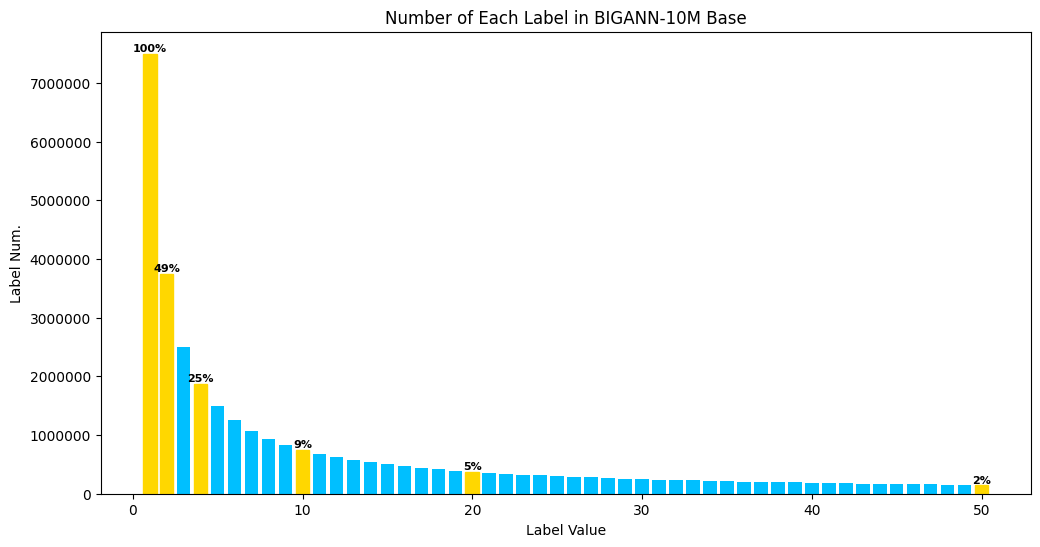

In [4]:
percentile = [100, 50, 25, 10, 5, 1]
# colors = ["deepskyblue", "mediumseagreen", "fuchsia", "lightcoral", "darkorange", "red"]
sorted_bigann = dict(sorted(bigann.items(), key=lambda item: item[1]))
keys = list(sorted_bigann.keys())
values = list(sorted_bigann.values())
max_value = max(values)
highlights = [max_value * (p / 100) for p in percentile]
choices = [np.argmin([abs(v - hv) for v in values]) for hv in highlights]

# plot bigann histogram
plt.figure(figsize=(12, 6))
bars = plt.bar(keys, values, color="deepskyblue")

used = defaultdict(int)

for i, idx in enumerate(choices):
    if idx in used:
        if used[idx] <= abs(percentile[i] - bigann[50 - idx] / max_value * 100):
            continue
    used[idx] = abs(percentile[i] - bigann[50 - idx] / max_value * 100)
    bars[idx].set_color("gold")
    plt.text(bars[idx].get_x() + bars[idx].get_width() / 2, bars[idx].get_height(), f"{int(bigann[50 - idx] / max_value * 100)}%", ha="center", va="bottom", fontsize=8, fontweight="bold")

plt.xlabel("Label Value")
plt.ylabel("Label Num.")
plt.title("Number of Each Label in BIGANN-10M Base")
plt.ticklabel_format(style="plain", axis='y')
plt.show()

In [5]:
deep_label_path = "/localdata/jsu068/deep/deep.10M.L50.zipf0.75.base.txt"
deep = analyze_labels(deep_label_path)

Total number of points = 10000000
Number of labels = 50
Average number of labels per point = 3.3731
Mean label size excluding 0 = 674610.860
Most popular label is 1 with 7500000 points
Label counts: {1: 7500000, 2: 3749821, 50: 149122, 4: 1875000, 6: 1249984, 18: 416178, 49: 153062, 5: 1499617, 9: 832477, 10: 749953, 48: 156250, 38: 197369, 15: 500000, 22: 340910, 37: 202703, 25: 299725, 11: 681819, 14: 535402, 19: 394737, 8: 937500, 36: 208115, 43: 174320, 7: 1071042, 12: 624829, 34: 220589, 17: 439577, 3: 2498791, 24: 312256, 31: 241406, 42: 178409, 23: 325963, 45: 166667, 46: 163044, 13: 575576, 32: 234375, 40: 187500, 33: 227273, 44: 169931, 35: 214286, 41: 182432, 28: 267707, 21: 357143, 26: 288330, 39: 191242, 29: 257974, 30: 249941, 20: 375000, 16: 468750, 27: 277469, 47: 158977}


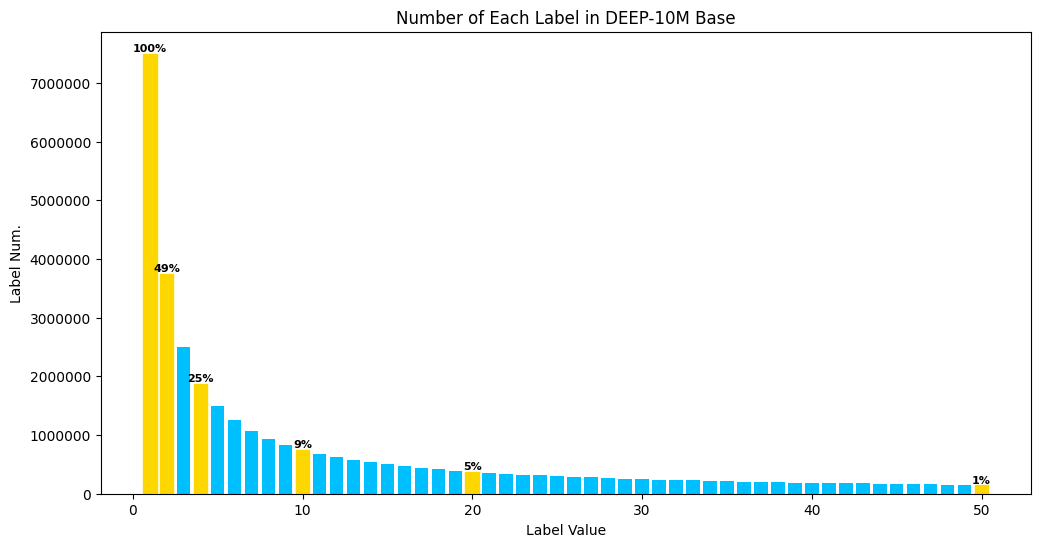

In [6]:
sorted_deep = dict(sorted(deep.items(), key=lambda item: item[1]))
keys = list(sorted_deep.keys())
values = list(sorted_deep.values())
max_value = max(values)
highlights = [max_value * (p / 100) for p in percentile]
choices = [np.argmin([abs(v - hv) for v in values]) for hv in highlights]

# plot deep histogram
plt.figure(figsize=(12, 6))
bars = plt.bar(keys, values, color="deepskyblue")

used = defaultdict(int)

for i, idx in enumerate(choices):
    if idx in used:
        if used[idx] <= abs(percentile[i] - deep[50 - idx] / max_value * 100):
            continue
    used[idx] = abs(percentile[i] - deep[50 - idx] / max_value * 100)
    bars[idx].set_color("gold")
    plt.text(bars[idx].get_x() + bars[idx].get_width() / 2, bars[idx].get_height(), f"{int(deep[50 - idx] / max_value * 100)}%", ha="center", va="bottom", fontsize=8, fontweight="bold")

plt.xlabel("Label Value")
plt.ylabel("Label Num.")
plt.title("Number of Each Label in DEEP-10M Base")
plt.ticklabel_format(style="plain", axis='y')
plt.show()

In [4]:
import struct
from pathlib import Path
from collections import defaultdict

In [5]:
marco_dir = Path("/localdata/jsu068/marco")
marco_embed_dir = marco_dir / "embedding"
marco_query_dir = marco_dir / "query"

In [6]:
with open(marco_embed_dir / "marco.768D.100M.euclidean.fbin", "rb") as f:
    n = struct.unpack('I', f.read(4))[0]
    dim = struct.unpack('I', f.read(4))[0]

n, dim

(101070374, 768)

In [7]:
meta = np.fromfile(marco_embed_dir / "meta.bin", dtype=np.uint8)
metaidx = np.fromfile(marco_embed_dir / "metaidx.bin", dtype=np.int32)

meta.shape, metaidx.shape

((909486248,), (202140751,))

In [8]:
# s = defaultdict(int)

# for idx in list(metaidx)[2:]:
#     if idx == 0:
#         continue
#     idx -= 1
#     s[meta[idx]] += 1
    
# s

In [8]:
marco_embed = defaultdict(int)
cnt = 0

for idx in list(metaidx)[2:]:
    if idx == 0:
        continue
    cnt += 1
    if (cnt == 10000000):
        break
    idx -= 1
    marco_embed[meta[idx]] += 1
    
marco_embed

defaultdict(int,
            {52: 1000972,
             55: 999906,
             54: 1000192,
             50: 999734,
             51: 998424,
             57: 1000636,
             48: 1000182,
             53: 999711,
             49: 1000082,
             56: 1000160})

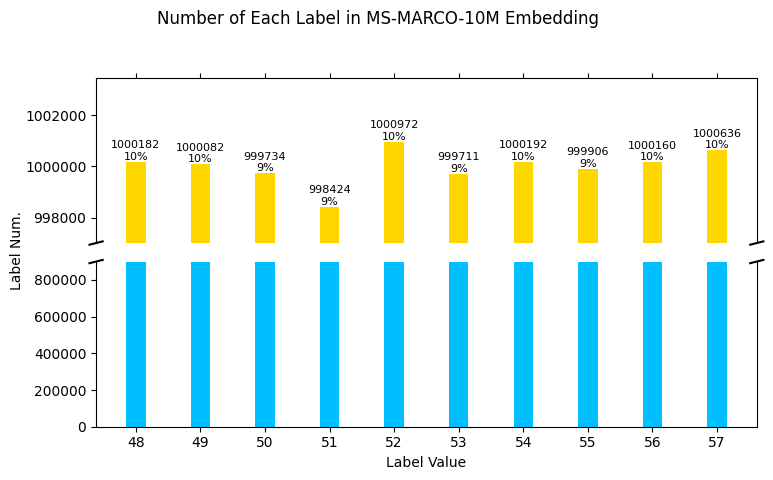

In [9]:
sorted_marco_embed = dict(sorted(marco_embed.items(), key=lambda item: item[1], reverse=True))
keys = list(sorted_marco_embed.keys())
values = list(sorted_marco_embed.values())

lower_limit = 0
upper_limit = 900000
cut_lower = 997000

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 5))

bar_width = 0.3
bars_upper = ax1.bar(keys, values, color="gold", width=bar_width)
ax1.set_xticks(keys)
ax1.set_ylim(cut_lower, max(values) + 2500)  # Display the higher part
ax1.ticklabel_format(style="plain", axis='y')

bars_lower = ax2.bar(keys, values, color="deepskyblue", width=bar_width)
ax2.set_xticks(keys)
ax2.set_ylim(lower_limit, upper_limit)  # Display the lower part
ax2.ticklabel_format(style="plain", axis='y')

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()

# Add diagonal lines to indicate the broken y-axis
d = .01  # Proportion of the diagonal cut size
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)  # Top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal

kwargs.update(transform=ax2.transAxes)  # Switch to the lower subplot
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal

for bar in bars_upper:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}\n{int(height/sum(sorted_marco_embed.values())*100.)}%', ha='center', va='bottom', fontsize=8)

ax2.set_xlabel("Label Value")
fig.text(0.04, 0.5, 'Label Num.', va='center', rotation='vertical', fontsize=10)

fig.suptitle("Number of Each Label in MS-MARCO-10M Embedding", ha='center')
plt.tight_layout(rect=[0.04, 0.03, 1, 0.95])
plt.show()

In [10]:
with open(marco_query_dir / "marco.768D.10K.euclidean.fbin", "rb") as f:
    n = struct.unpack('I', f.read(4))[0]
    dim = struct.unpack('I', f.read(4))[0]

n, dim

(9376, 768)

In [11]:
meta = np.fromfile(marco_query_dir / "meta.bin", dtype=np.uint8)
metaidx = np.fromfile(marco_query_dir / "metaidx.bin", dtype=np.int32)

meta.shape, metaidx.shape

((36397,), (18755,))

In [12]:
marco_query = defaultdict(int)

for idx in list(metaidx)[2:]:
    if idx == 0:
        continue
    idx -= 1
    marco_query[meta[idx]] += 1
    
marco_query

defaultdict(int,
            {57: 938,
             49: 938,
             54: 937,
             55: 937,
             48: 938,
             56: 937,
             53: 937,
             51: 938,
             50: 938,
             52: 938})

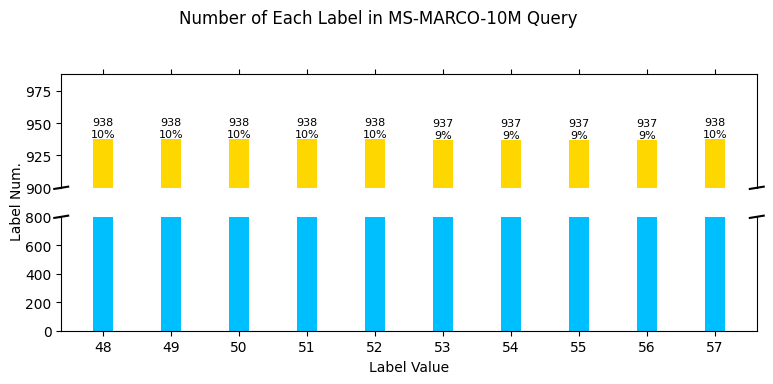

In [13]:
sorted_marco_query = dict(sorted(marco_query.items(), key=lambda item: item[1], reverse=True))
keys = list(sorted_marco_query.keys())
values = list(sorted_marco_query.values())

lower_limit = 0
upper_limit = 800
cut_lower = 900

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 4))

bar_width = 0.3
bars_upper = ax1.bar(keys, values, color="gold", width=bar_width)
ax1.set_xticks(keys)
ax1.set_ylim(cut_lower, max(values) + 50)  # Display the higher part
ax1.ticklabel_format(style="plain", axis='y')

bars_lower = ax2.bar(keys, values, color="deepskyblue", width=bar_width)
ax2.set_xticks(keys)
ax2.set_ylim(lower_limit, upper_limit)  # Display the lower part
ax2.ticklabel_format(style="plain", axis='y')

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()

# Add diagonal lines to indicate the broken y-axis
d = .01  # Proportion of the diagonal cut size
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)  # Top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal

kwargs.update(transform=ax2.transAxes)  # Switch to the lower subplot
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal

for bar in bars_upper:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}\n{int(height/sum(sorted_marco_query.values())*100.)}%', ha='center', va='bottom', fontsize=8)

ax2.set_xlabel("Label Value")
fig.text(0.04, 0.5, 'Label Num.', va='center', rotation='vertical', fontsize=10)

fig.suptitle("Number of Each Label in MS-MARCO-10M Query", ha='center')
plt.tight_layout(rect=[0.04, 0.03, 1, 0.95])
plt.show()

In [9]:
yfcc_dir = Path("/localdata/jsu068/yfcc")
base_filter_dir = yfcc_dir / "yfcc.filter.base.txt"
query_filter_dir = yfcc_dir / "yfcc.filter.query.txt"

In [12]:
yfcc_base_filters = analyze_labels(base_filter_dir)

Total number of points = 10000000
Number of labels = 200362
Average number of labels per point = 10.8113
Mean label size excluding 0 = 539.586
Most popular label is 23 with 3386745 points


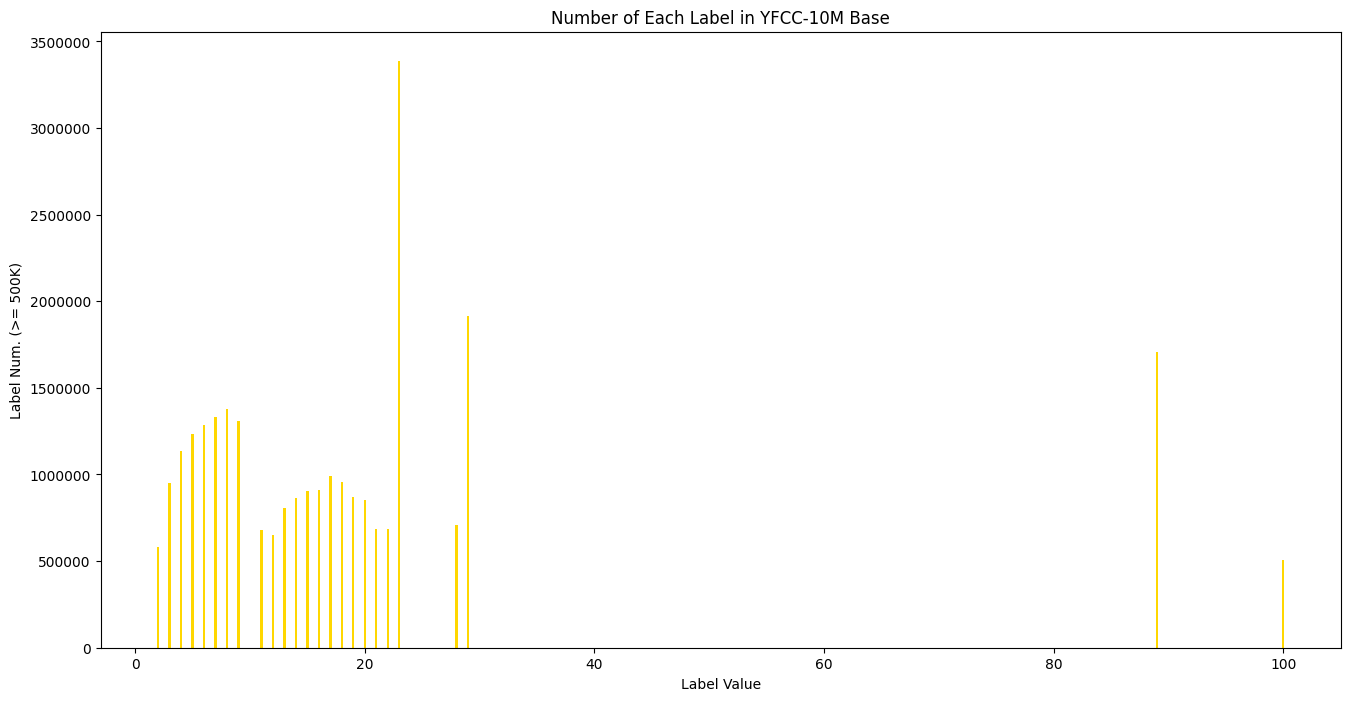

In [13]:
# sorted_yfcc_base_filters = dict(sorted(yfcc_base_filters.items(), key=lambda item: item[1], reverse=True))
sorted_yfcc_base_filters = {k: v for k, v in sorted(yfcc_base_filters.items(), key=lambda item: item[1], reverse=True) if v >= 500000}
keys = list(sorted_yfcc_base_filters.keys())
values = list(sorted_yfcc_base_filters.values())

plt.figure(figsize=(16, 8))
bars = plt.bar(keys, values, color="gold", width=0.2)

plt.xlabel("Label Value")
plt.ylabel("Label Num. (>= 500K)")
plt.title("Number of Each Label in YFCC-10M Base")
plt.ticklabel_format(style="plain", axis='x')
plt.ticklabel_format(style="plain", axis='y')
plt.show()

In [14]:
yfcc_query_filters = analyze_labels(query_filter_dir)

Total number of points = 100000
Number of labels = 7909
Average number of labels per point = 1.3760
Mean label size excluding 0 = 17.398
Most popular label is 89 with 3174 points


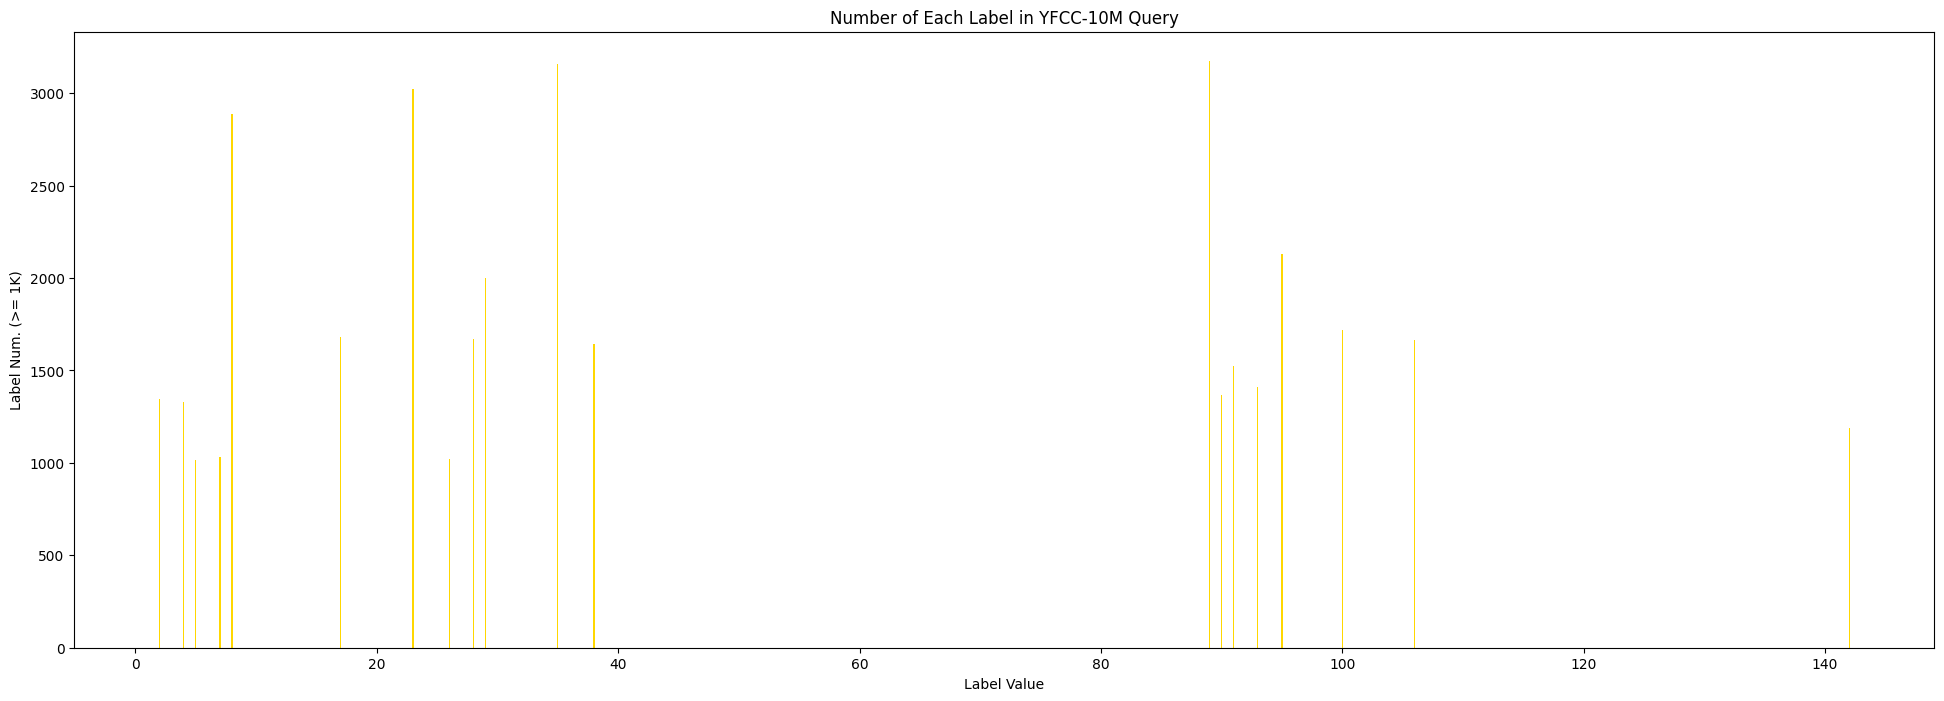

In [15]:
sorted_yfcc_query_filters = {k: v for k, v in sorted(yfcc_query_filters.items(), key=lambda item: item[1], reverse=True) if k > 0 and v >= 1000}
keys = list(sorted_yfcc_query_filters.keys())
values = list(sorted_yfcc_query_filters.values())

plt.figure(figsize=(24, 8))
bars = plt.bar(keys, values, color="gold", width=0.1)

plt.xlabel("Label Value")
plt.ylabel("Label Num. (>= 1K)")
plt.title("Number of Each Label in YFCC-10M Query")
plt.ticklabel_format(style="plain", axis='x')
plt.ticklabel_format(style="plain", axis='y')
plt.show()

In [16]:
percentile = [100, 75, 50, 25, 1]
sorted_yfcc_base = sorted(yfcc_base_filters.items(), key=lambda item: item[1], reverse=True)
max_value = sorted_yfcc_base[0][1]

highlights = [max_value * (p / 100) for p in percentile]
choices = [np.argmin([abs(v - hv) for k, v in sorted_yfcc_base if k in yfcc_query_filters]) for hv in highlights]

choices, [sorted_yfcc_base[i] for i in choices], [sorted_yfcc_base[i][1] / max_value for i in choices]

([np.int64(0), np.int64(1), np.int64(2), np.int64(16), np.int64(235)],
 [(23, 3386745), (29, 1915985), (89, 1707412), (20, 851688), (1589, 33896)],
 [1.0,
  0.5657305170598909,
  0.5041454257701716,
  0.2514768605253717,
  0.010008429923126777])

In [1]:
import struct
import numpy as np
# from mmap import mmap
import mmap
from pathlib import Path
from collections import defaultdict
import matplotlib.pyplot as plt

yfcc_dir = Path("/localdata/jsu068/yfcc")
base_filter_dir = yfcc_dir / "yfcc.filter.base.bin"
query_filter_dir = yfcc_dir / "yfcc.filter.query.bin"

In [2]:
with open(base_filter_dir, "rb") as f:
    n = struct.unpack('I', f.read(4))[0]

labels = np.memmap(base_filter_dir, dtype=np.int32, mode='r')

n, labels.shape

(10000000, (118211549,))

In [3]:
# separator = np.iinfo(np.uint32).max - 1
separator = -1
yfcc_base_filters = defaultdict(int)

for label in labels:
    if label != separator:
        yfcc_base_filters[label] += 1

len(yfcc_base_filters)

200364

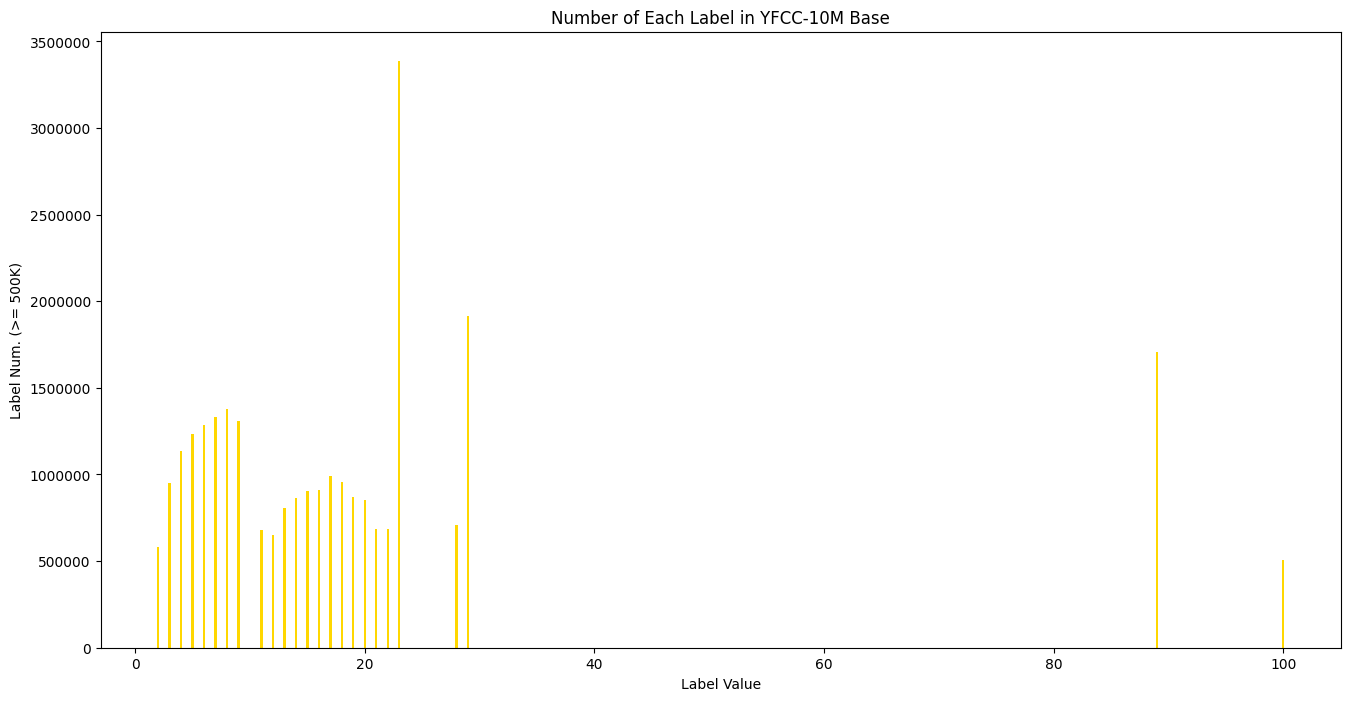

In [4]:
# sorted_yfcc_base_filters = dict(sorted(yfcc_base_filters.items(), key=lambda item: item[1], reverse=True))
sorted_yfcc_base_filters = {k: v for k, v in sorted(yfcc_base_filters.items(), key=lambda item: item[1], reverse=True) if v >= 500000}
keys = list(sorted_yfcc_base_filters.keys())
values = list(sorted_yfcc_base_filters.values())

plt.figure(figsize=(16, 8))
bars = plt.bar(keys, values, color="gold", width=0.2)

plt.xlabel("Label Value")
plt.ylabel("Label Num. (>= 500K)")
plt.title("Number of Each Label in YFCC-10M Base")
plt.ticklabel_format(style="plain", axis='x')
plt.ticklabel_format(style="plain", axis='y')
plt.show()

In [5]:
with open(query_filter_dir, "rb") as f:
    n = struct.unpack('I', f.read(4))[0]

labels = np.memmap(query_filter_dir, dtype=np.int32, mode='r')

n, labels.shape

(100000, (238375,))

In [6]:
# separator = np.iinfo(np.uint32).max - 1
separator = 0
yfcc_query_filters = defaultdict(int)

for label in labels:
    if label != separator:
        yfcc_query_filters[label] += 1

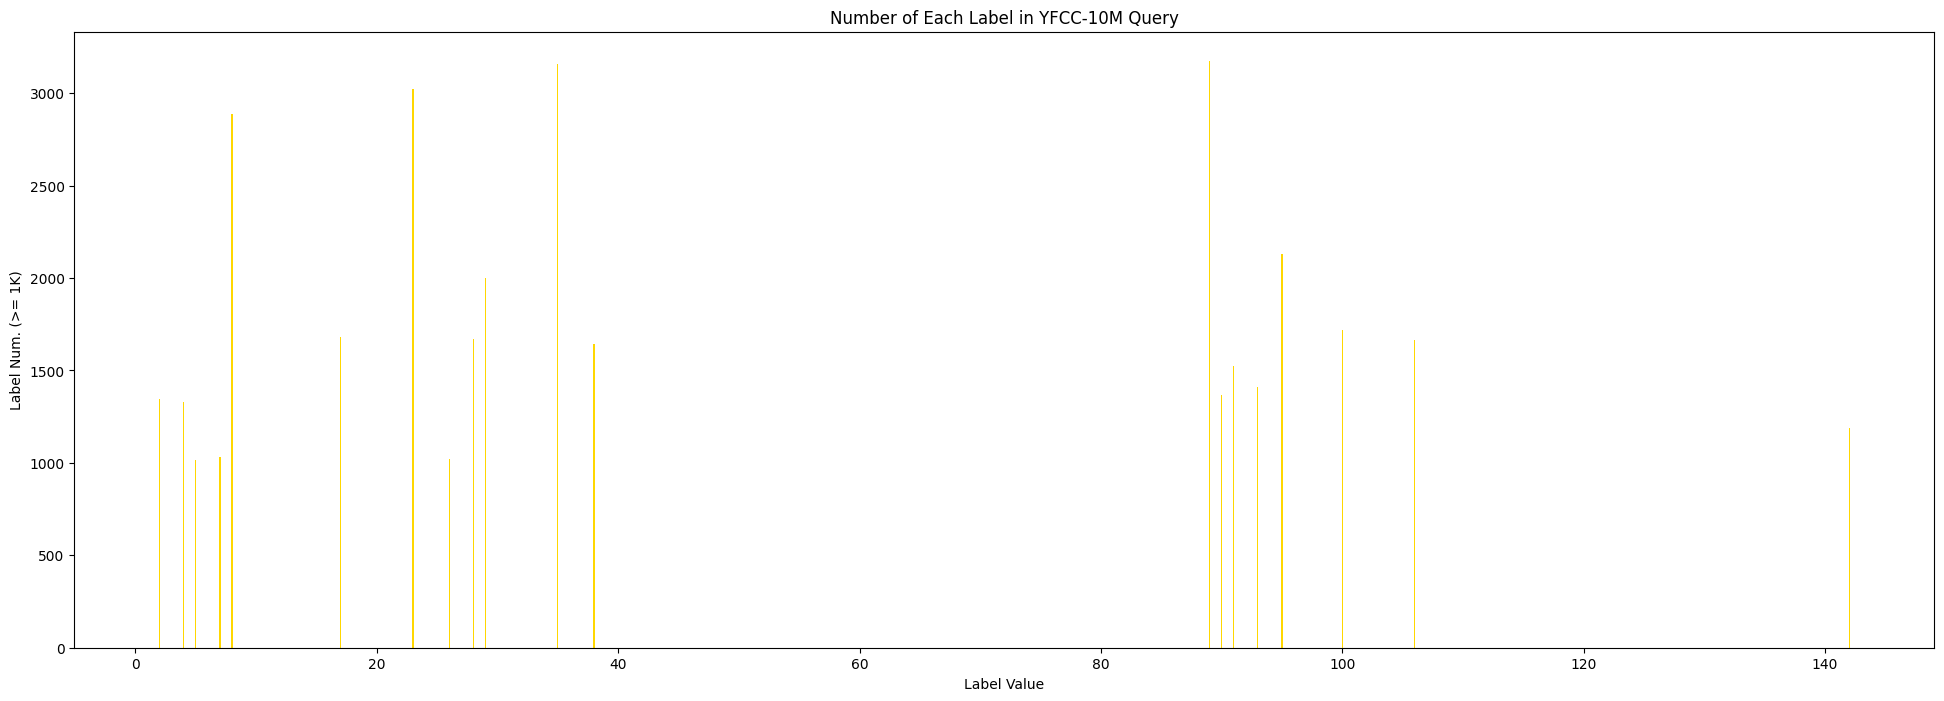

In [11]:
sorted_yfcc_query_filters = {k: v for k, v in sorted(yfcc_query_filters.items(), key=lambda item: item[1], reverse=True) if k > 0 and v >= 1000}
keys = list(sorted_yfcc_query_filters.keys())
values = list(sorted_yfcc_query_filters.values())

plt.figure(figsize=(24, 8))
bars = plt.bar(keys, values, color="gold", width=0.1)

plt.xlabel("Label Value")
plt.ylabel("Label Num. (>= 1K)")
plt.title("Number of Each Label in YFCC-10M Query")
plt.ticklabel_format(style="plain", axis='x')
plt.ticklabel_format(style="plain", axis='y')
plt.show()

In [12]:
percentile = [100, 75, 50, 25, 1]
sorted_yfcc_base = sorted(yfcc_base_filters.items(), key=lambda item: item[1], reverse=True)
max_value = sorted_yfcc_base[0][1]

highlights = [max_value * (p / 100) for p in percentile]
choices = [np.argmin([abs(v - hv) for k, v in sorted_yfcc_base if k in yfcc_query_filters]) for hv in highlights]

choices, [sorted_yfcc_base[i] for i in choices], [sorted_yfcc_base[i][1] / max_value for i in choices]

([0, 1, 2, 16, 235],
 [(23, 3386745), (29, 1915985), (89, 1707412), (20, 851688), (5893, 33992)],
 [1.0,
  0.5657305170598909,
  0.5041454257701716,
  0.2514768605253717,
  0.010036775724183544])

In [14]:
yfcc_base_filters[1589], yfcc_base_filters[5893]

(33896, 33992)

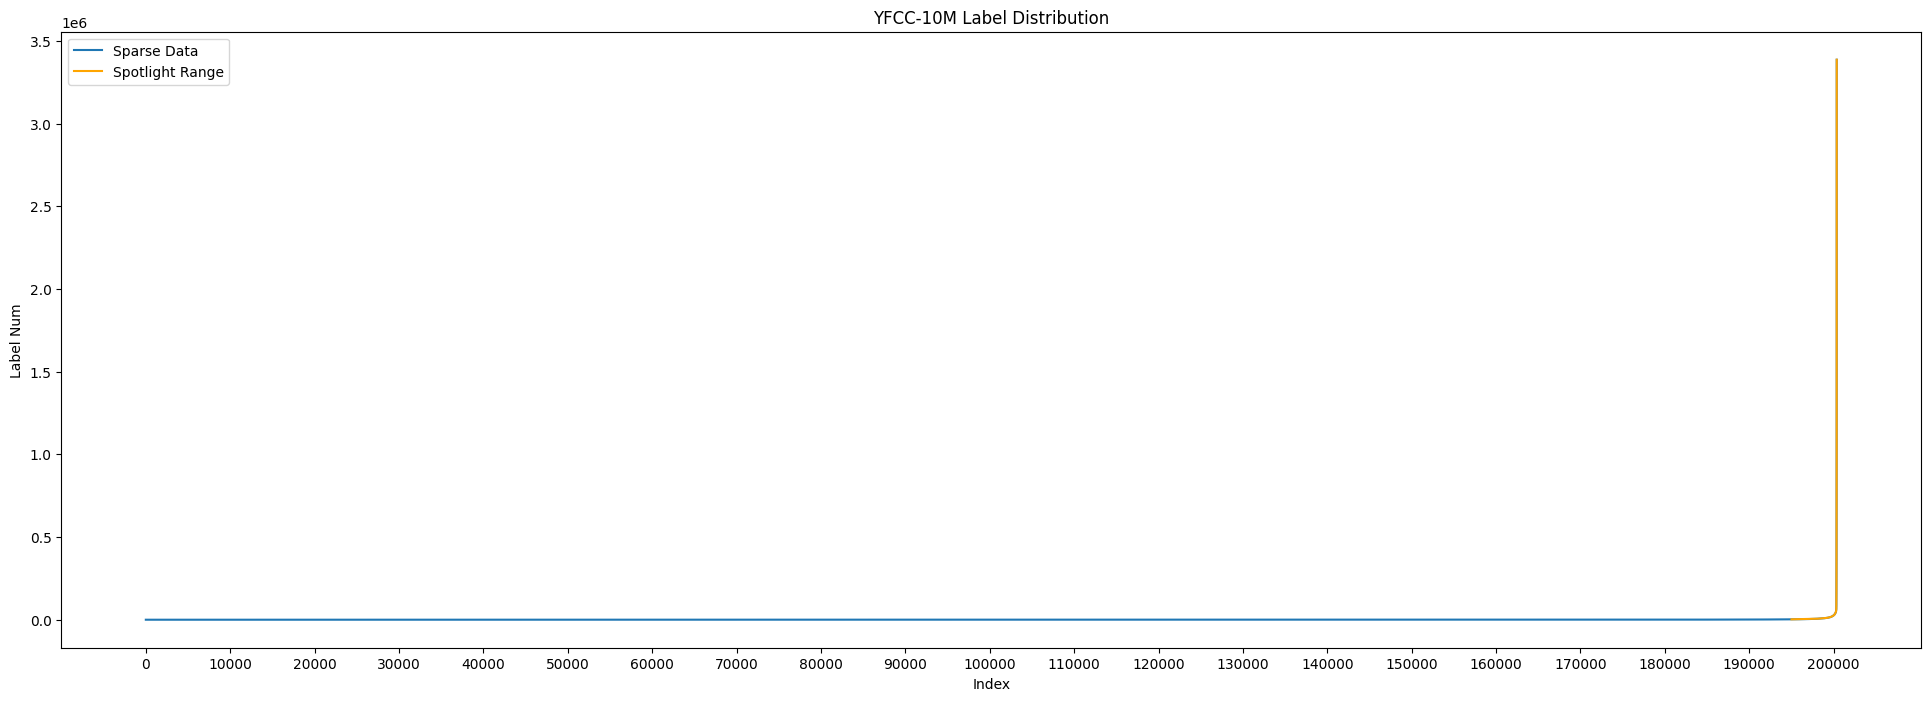

In [71]:
import matplotlib.pyplot as plt

# Read the extracted numbers from the file
with open("../test/extracted_yfcc_label_numbers.txt", 'r') as file:
    nums = [int(line.strip()) for line in file]

# Sort the numbers
nums = sorted(nums)

# Define the x range you want to highlight
highlight_start = 195000
highlight_end = 200363

x_values = list(range(len(nums)))

plt.figure(figsize=(24, 8))
plt.plot(x_values, nums, label='Sparse Data')
plt.plot(x_values[highlight_start:highlight_end+1], nums[highlight_start:highlight_end+1], label='Spotlight Range', color='orange')
plt.xticks(range(0, len(nums), 10000))
plt.xlabel('Index')
plt.ylabel('Label Num')
plt.title('YFCC-10M Label Distribution')
plt.legend()
plt.show()


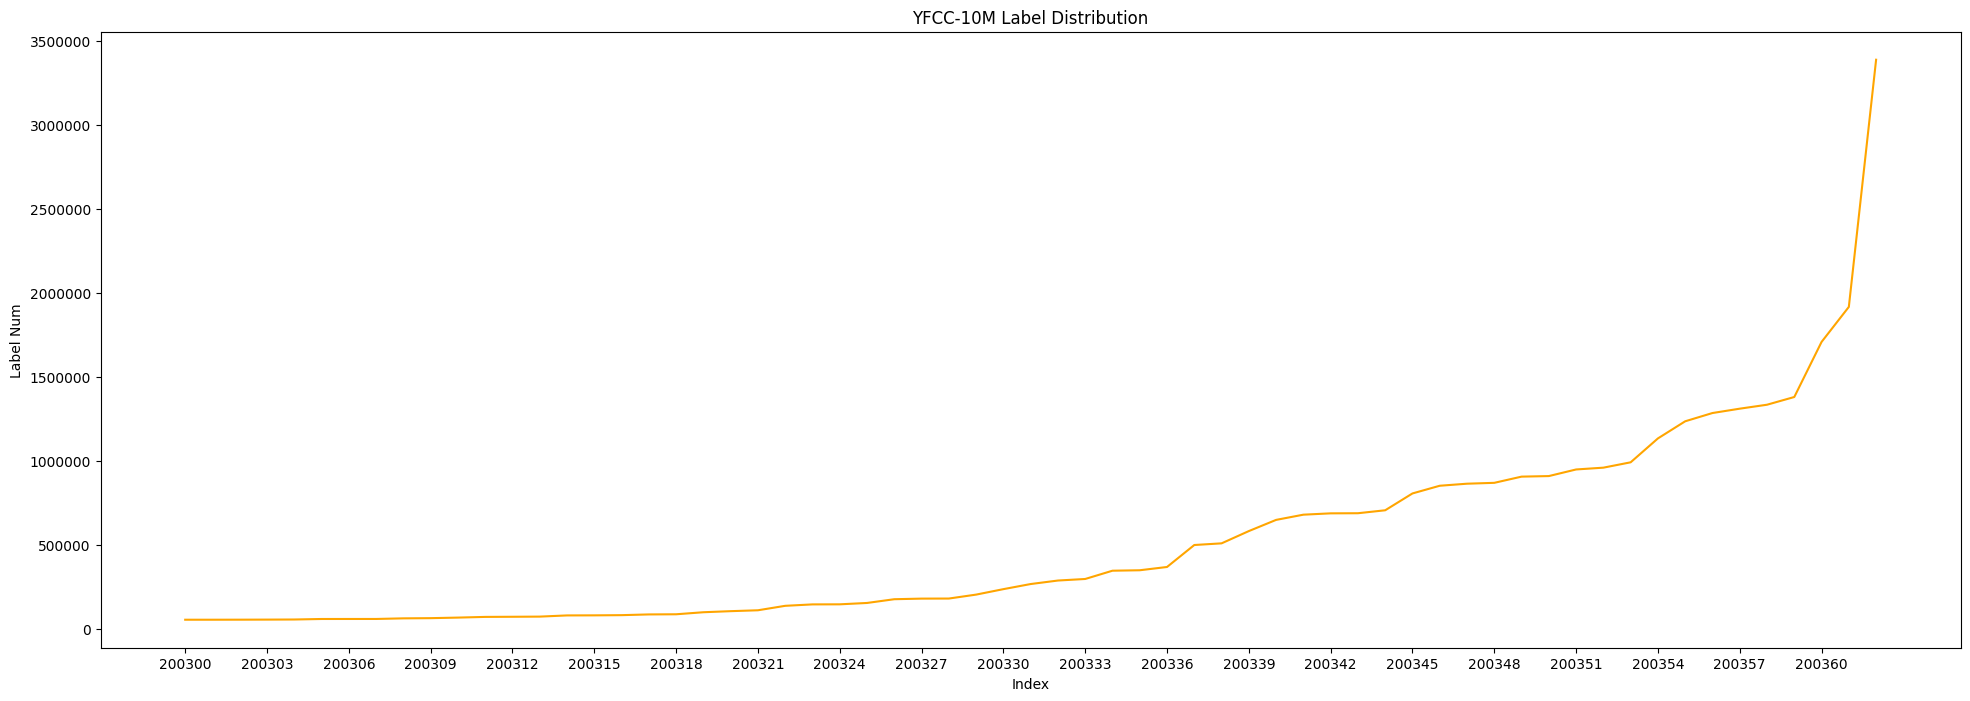

In [72]:
new_nums = nums[200300:]
x_values = list(range(len(new_nums)))

plt.figure(figsize=(24, 8))
plt.plot(x_values, new_nums, color='orange')
ticks = range(0, len(new_nums), 3)
labels = [f'{200300+i*3}' for i in range(len(ticks))]
plt.xticks(ticks=ticks, labels=labels)
plt.xlabel('Index')
plt.ylabel('Label Num')
plt.title('YFCC-10M Label Distribution')
plt.gca().ticklabel_format(style="plain", axis='y')
plt.show()